In [1]:
!pip install -Uqq fastbook
import fastbook

In [2]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.imports import *
from fastai.vision.core import *
from fastai import metrics
torch.cuda.get_device_properties(0).total_memory

15812263936

In [3]:
path=untar_data("https://s3.amazonaws.com/fast-ai-imageclas/imagewoof-320.tgz")

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/imagewoof-320/train'),Path('/root/.fastai/data/imagewoof-320/val')]

In [5]:
def label_func(x):
    return str(x.parent.name)

#***Image Size 128 (Random cropped) :***  Accuracy = 88.8%  

In [6]:
dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter = FuncSplitter(lambda o: Path(o).parent.parent.name == 'val'),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

In [7]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 12954 items
2 datasets of sizes 12454,500
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/imagewoof-320/train/n02099601/n02099601_3523.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=494x320
  Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/imagewoof-320/train/n02099601/n02099601_3523.JPEG
    applying label_func gives
      n02099601
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=494x320, TensorCategory(6))


Found 12954 items
2 datasets of sizes 12454,500
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

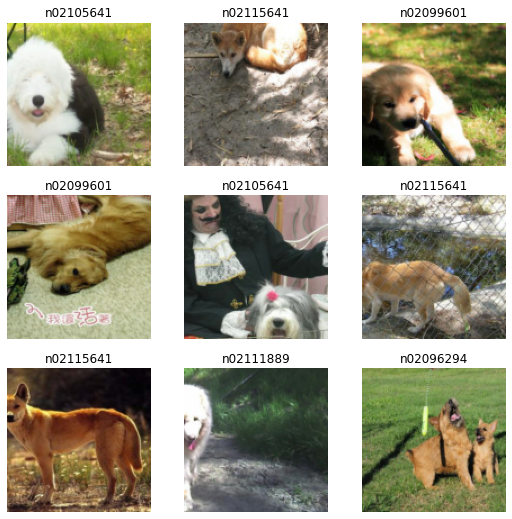

In [8]:
dls = dblock.dataloaders(path,bs=64)
dls.show_batch()

In [43]:
print("Number of classes : ",len(dls.vocab))
print("Classes : ",dls.vocab )

Number of classes :  10
Classes :  ['n02086240', 'n02087394', 'n02088364', 'n02089973', 'n02093754', 'n02096294', 'n02099601', 'n02105641', 'n02111889', 'n02115641']


In [12]:
learn = cnn_learner(dls, resnet50, metrics=accuracy )

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.0005754399462603033)

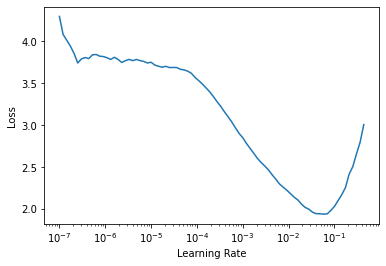

In [13]:
learn.lr_find()

## **Training**

In [14]:
learn.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.795216,0.580232,0.840000,00:57


epoch,train_loss,valid_loss,accuracy,time
0,0.465609,0.434738,0.866000,01:03
1,0.401914,0.439775,0.862000,01:03
2,0.337833,0.449864,0.870000,01:04
3,0.278865,0.398505,0.872000,01:05
4,0.216556,0.381976,0.880000,01:05
5,0.178188,0.391675,0.872000,01:04
6,0.118455,0.386160,0.894000,01:05
7,0.100702,0.389952,0.878000,01:05
8,0.080127,0.396556,0.892000,01:05
9,0.082602,0.396284,0.888000,01:05


## **Results**

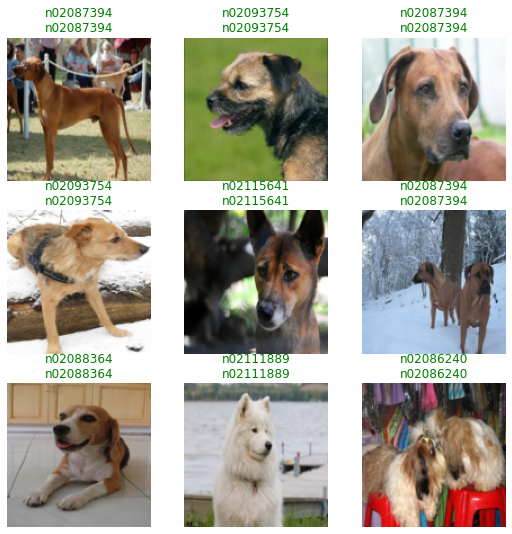

In [32]:
learn.show_results()

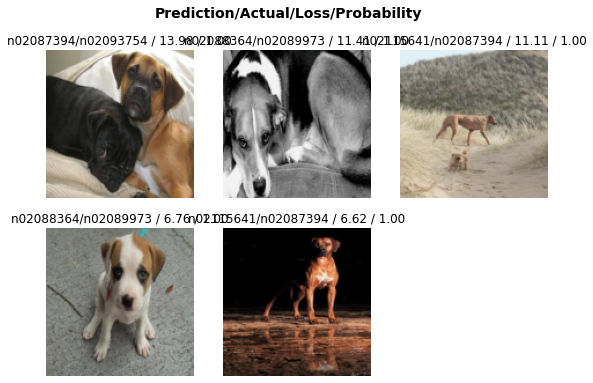

In [34]:
interp128 = Interpretation.from_learner(learn)
interp128.plot_top_losses(5)

Total images per class = 50


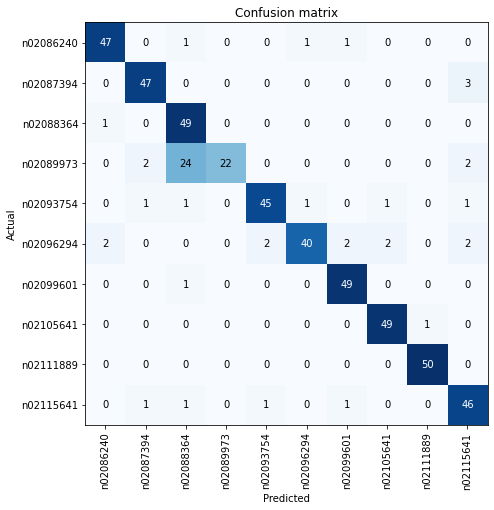

In [39]:
print("Total images per class = 50")

interp128 = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp128.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)
interp128.plot_confusion_matrix(figsize=(7,7))

In [15]:
learn.save("patch-build")

Path('models/patch-build.pth')

#***Image Size 256 (Random Cropped) :*** Accuracy = 93%  

In [22]:
dbloc = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter = FuncSplitter(lambda o: Path(o).parent.parent.name == 'val'),
                   item_tfms = RandomResizedCrop(256, min_scale=0.35), 
                   batch_tfms= [*aug_transforms(),Normalize.from_stats(*imagenet_stats)])

In [23]:
dbloc.summary(path)

Setting-up type transforms pipelines
Found 12954 items
2 datasets of sizes 12454,500
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/imagewoof-320/train/n02099601/n02099601_3523.JPEG
    applying PILBase.create gives
      PILImage mode=RGB size=494x320
  Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/imagewoof-320/train/n02099601/n02099601_3523.JPEG
    applying label_func gives
      n02099601
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=494x320, TensorCategory(6))


Found 12954 items
2 datasets of sizes 12454,500
Setting up Pipeline: PILBase.create
Setting up Pipeline: label_func -> Categorize -- {'vocab': None, 'sort': True, 'add_na':

In [24]:
dl = dbloc.dataloaders(path,bs=64)

In [25]:
lear = cnn_learner(dl, resnet50, metrics=accuracy )

In [59]:
print("Loss Function : ",lear.loss_func)
print("Optimizer : ADAM")

Loss Function :  FlattenedLoss of CrossEntropyLoss()
Optimizer : ADAM


SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.0003981071640737355)

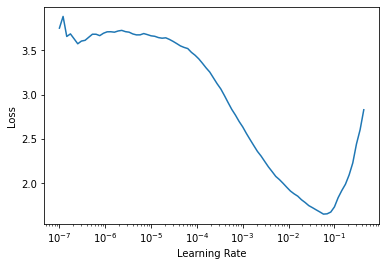

In [26]:
lear.lr_find()

## **Training**

In [27]:
lear.fine_tune(10,base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.374260,0.289918,0.922000,02:36


epoch,train_loss,valid_loss,accuracy,time
0,0.250057,0.311595,0.926000,03:29
1,0.264103,0.427721,0.888000,03:31
2,0.236345,0.352023,0.894000,03:31
3,0.225606,0.330706,0.902000,03:31
4,0.155965,0.346719,0.900000,03:31
5,0.143662,0.244511,0.934000,03:31
6,0.099810,0.290332,0.922000,03:31
7,0.085527,0.294507,0.926000,03:31
8,0.066665,0.285726,0.932000,03:31
9,0.069759,0.292498,0.930000,03:31


## **Results**

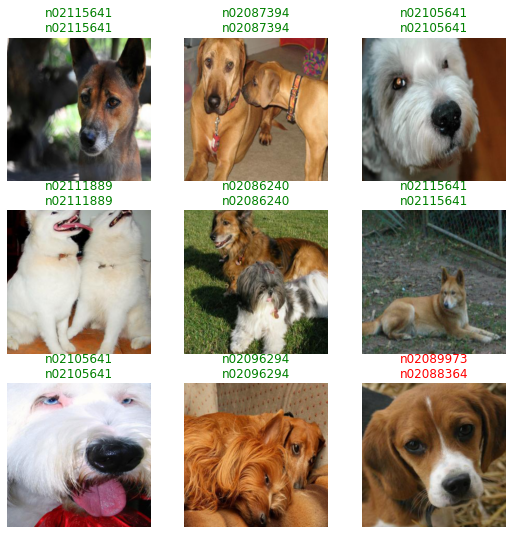

In [35]:
lear.show_results()

Top Losses


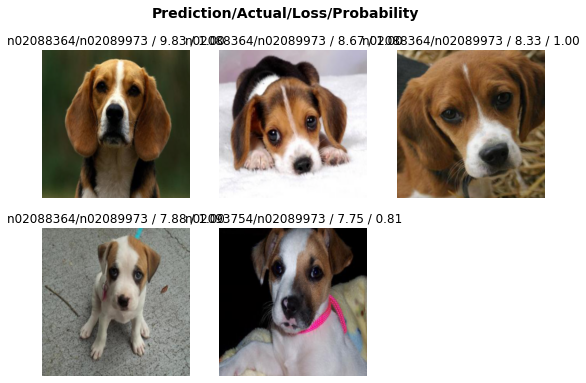

In [42]:
print("Top Losses")
interp = Interpretation.from_learner(lear)
interp.plot_top_losses(5)

Total images per class = 50


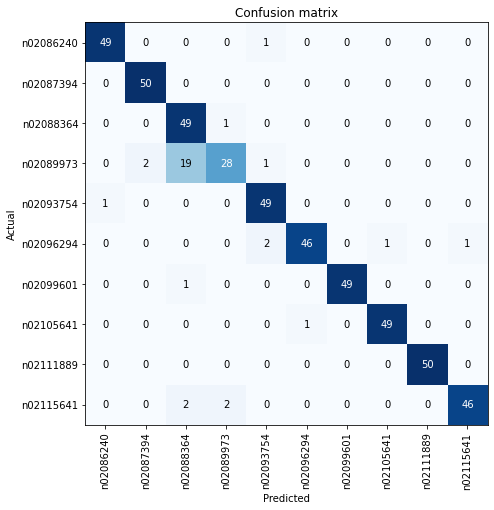

In [38]:
print("Total images per class = 50")

interps = ClassificationInterpretation.from_learner(lear)
losses,idxs = interps.top_losses()
len(dl.valid_ds)==len(losses)==len(idxs)
interps.plot_confusion_matrix(figsize=(7,7))